In [1]:
import tensorflow as tf
from tensorflow import keras

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

#11.1 그레이디언트 소실과 폭주 문제 

In [2]:
keras.layers.Dense(10,activation="relu", kernel_initializer="he_normal")

In [3]:
he_avg_init = keras.initializers.VarianceScaling(scale=2, mode='fan_avg', distribution='uniform')
keras.layers.Dense(10, activation="sigmoid",kernel_initializer=he_avg_init)

In [4]:
#Leaky ReLU
def leaky_relu(z, alpha=0.01):
  return np.maximum(alpha*z, z)

(-5.0, 5.0, -0.5, 4.2)

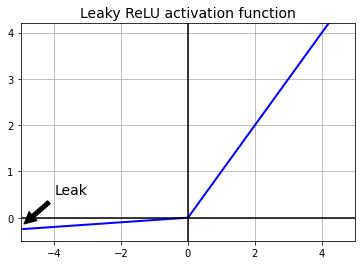

In [5]:
z = np.linspace(-5, 5, 200)

plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

In [6]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

4431872/4422102 [==============================] - 0s 0us/step


In [7]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28,28]),
  keras.layers.Dense(300, kernel_initializer="he_normal"),
  keras.layers.LeakyReLU(),
  keras.layers.Dense(100, kernel_initializer="he_normal"),
  keras.layers.LeakyReLU(),
  keras.layers.Dense(10, activation='softmax')
])

In [8]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train, epochs=10,validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 1.2819 - accuracy: 0.6229 - val_loss: 0.8886 - val_accuracy: 0.7160
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.7955 - accuracy: 0.7361 - val_loss: 0.7130 - val_accuracy: 0.7656
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6816 - accuracy: 0.7721 - val_loss: 0.6427 - val_accuracy: 0.7900
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6217 - accuracy: 0.7944 - val_loss: 0.5900 - val_accuracy: 0.8064
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5832 - accuracy: 0.8074 - val_loss: 0.5582 - val_accuracy: 0.8200
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5553 - accuracy: 0.8156 - val_loss: 0.5350 - val_accuracy: 0.8238
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5339 - accuracy: 0.8223 - val_loss: 0.5156 - val_accuracy:

In [10]:
#PReLU
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28,28]),
  keras.layers.Dense(300, kernel_initializer="he_normal"),
  keras.layers.PReLU(),
  keras.layers.Dense(100, kernel_initializer="he_normal"),
  keras.layers.PReLU(),
  keras.layers.Dense(10, activation='softmax')
])

In [11]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 1.3461 - accuracy: 0.6209 - val_loss: 0.9255 - val_accuracy: 0.7186
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.8197 - accuracy: 0.7355 - val_loss: 0.7305 - val_accuracy: 0.7628
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6966 - accuracy: 0.7694 - val_loss: 0.6565 - val_accuracy: 0.7878
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6331 - accuracy: 0.7909 - val_loss: 0.6004 - val_accuracy: 0.8046
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5917 - accuracy: 0.8057 - val_loss: 0.5656 - val_accuracy: 0.8180
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5618 - accuracy: 0.8135 - val_loss: 0.5406 - val_accuracy: 0.8240
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5390 - accuracy: 0.8206 - val_loss: 0.5196 - val_accuracy:

In [13]:
#SELU
from scipy.special import erfc

alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

def selu(z, scale=scale_0_1, alpha=alpha_0_1):
  return scale*elu(z,alpha)

np.random.seed(42)
Z = np.random.normal(size=(500, 100)) # standardized inputs
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100)) # LeCun initialization
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.83
Layer 900: mean 0.02, std deviation 1.00


In [13]:
keras.layers.Dense(10, activation='selu',kernel_initializer='lecun_normal')

In [14]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='selu',kernel_initializer='lecun_normal'))

for layer in range(99):
  model.add(keras.layers.Dense(100, activation='selu',
                               kernel_initializer="lecun_normal"))
  
model.add(keras.layers.Dense(10, activation='softmax'))

In [15]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['accuracy'])

In [16]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [17]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 35s 19ms/step - loss: 1.2989 - accuracy: 0.4877 - val_loss: 0.8950 - val_accuracy: 0.6724
Epoch 2/10
1719/1719 [==============================] - 32s 19ms/step - loss: 0.8615 - accuracy: 0.6677 - val_loss: 0.6460 - val_accuracy: 0.7512
Epoch 3/10
1719/1719 [==============================] - 32s 19ms/step - loss: 0.6214 - accuracy: 0.7700 - val_loss: 0.6217 - val_accuracy: 0.7526
Epoch 4/10
1719/1719 [==============================] - 32s 19ms/step - loss: 0.5572 - accuracy: 0.8012 - val_loss: 0.6524 - val_accuracy: 0.7706
Epoch 5/10
1719/1719 [==============================] - 32s 19ms/step - loss: 0.5080 - accuracy: 0.8230 - val_loss: 0.5138 - val_accuracy: 0.8222
Epoch 6/10
1719/1719 [==============================] - 32s 19ms/step - loss: 0.5323 - accuracy: 0.8170 - val_loss: 0.4669 - val_accuracy: 0.8348
Epoch 7/10
1719/1719 [==============================] - 32s 19ms/step - loss: 0.4631 - accuracy: 0.8390 - val_loss: 0.4523 -

In [18]:
#BatchNormalization
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [19]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense_109 (Dense)           (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_110 (Dense)           (None, 100)               30100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)             

In [20]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [21]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.8750 - accuracy: 0.7124 - val_loss: 0.5525 - val_accuracy: 0.8228
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5753 - accuracy: 0.8031 - val_loss: 0.4725 - val_accuracy: 0.8472
Epoch 3/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5190 - accuracy: 0.8204 - val_loss: 0.4375 - val_accuracy: 0.8548
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4827 - accuracy: 0.8324 - val_loss: 0.4152 - val_accuracy: 0.8596
Epoch 5/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4566 - accuracy: 0.8410 - val_loss: 0.3997 - val_accuracy: 0.8644
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4398 - accuracy: 0.8475 - val_loss: 0.3867 - val_accuracy: 0.8694
Epoch 7/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4242 - accuracy: 0.8514 - val_loss: 0.3764 - val_ac

In [22]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [24]:
[(var.name, var.trainable) for var in model.layers[3].variables]

[('batch_normalization_1/gamma:0', True),
 ('batch_normalization_1/beta:0', True),
 ('batch_normalization_1/moving_mean:0', False),
 ('batch_normalization_1/moving_variance:0', False)]

In [25]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [26]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [27]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 11s 6ms/step - loss: 1.0317 - accuracy: 0.6757 - val_loss: 0.6767 - val_accuracy: 0.7812
Epoch 2/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.6790 - accuracy: 0.7793 - val_loss: 0.5566 - val_accuracy: 0.8180
Epoch 3/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5960 - accuracy: 0.8037 - val_loss: 0.5007 - val_accuracy: 0.8362
Epoch 4/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5447 - accuracy: 0.8193 - val_loss: 0.4666 - val_accuracy: 0.8448
Epoch 5/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5109 - accuracy: 0.8279 - val_loss: 0.4434 - val_accuracy: 0.8532
Epoch 6/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4898 - accuracy: 0.8337 - val_loss: 0.4263 - val_accuracy: 0.8550
Epoch 7/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4712 - accuracy: 0.8396 - val_loss: 0.4130 - val_ac

###그레이디언트 클리핑

In [29]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)
model.compile(loss='mse', optimizer=optimizer)

#11.2 사전훈련된 층 재사용하기

In [33]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [34]:
tf.random.set_seed(42)
np.random.seed(42)

model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [35]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [36]:
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.5927 - accuracy: 0.8104 - val_loss: 0.3896 - val_accuracy: 0.8667
Epoch 2/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.3523 - accuracy: 0.8786 - val_loss: 0.3289 - val_accuracy: 0.8824
Epoch 3/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.3170 - accuracy: 0.8896 - val_loss: 0.3014 - val_accuracy: 0.8989
Epoch 4/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.2973 - accuracy: 0.8975 - val_loss: 0.2894 - val_accuracy: 0.9021
Epoch 5/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.2835 - accuracy: 0.9022 - val_loss: 0.2776 - val_accuracy: 0.9066
Epoch 6/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.2729 - accuracy: 0.9061 - val_loss: 0.2735 - val_accuracy: 0.9071
Epoch 7/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.2641 - accuracy: 0.9093 - val_loss: 0.2720 - val_accuracy:

In [37]:
model_A.save("my_model_A.h5")

In [38]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [39]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [40]:
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 1s 60ms/step - loss: 0.9573 - accuracy: 0.4650 - val_loss: 0.6314 - val_accuracy: 0.6004
Epoch 2/20
7/7 [==============================] - 0s 17ms/step - loss: 0.5692 - accuracy: 0.7450 - val_loss: 0.4784 - val_accuracy: 0.8529
Epoch 3/20
7/7 [==============================] - 0s 18ms/step - loss: 0.4503 - accuracy: 0.8650 - val_loss: 0.4102 - val_accuracy: 0.8945
Epoch 4/20
7/7 [==============================] - 0s 17ms/step - loss: 0.3879 - accuracy: 0.8950 - val_loss: 0.3647 - val_accuracy: 0.9178
Epoch 5/20
7/7 [==============================] - 0s 18ms/step - loss: 0.3435 - accuracy: 0.9250 - val_loss: 0.3300 - val_accuracy: 0.9320
Epoch 6/20
7/7 [==============================] - 0s 17ms/step - loss: 0.3081 - accuracy: 0.9300 - val_loss: 0.3019 - val_accuracy: 0.9402
Epoch 7/20
7/7 [==============================] - 0s 18ms/step - loss: 0.2800 - accuracy: 0.9350 - val_loss: 0.2804 - val_accuracy: 0.9422
Epoch 8/20
7/7 [===========

In [42]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation='sigmoid'))

In [43]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())
model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [44]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

In [45]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 1s 56ms/step - loss: 1.3102 - accuracy: 0.3750 - val_loss: 1.2296 - val_accuracy: 0.4391
Epoch 2/4
7/7 [==============================] - 0s 14ms/step - loss: 1.1889 - accuracy: 0.4300 - val_loss: 1.1281 - val_accuracy: 0.4848
Epoch 3/4
7/7 [==============================] - 0s 15ms/step - loss: 1.0844 - accuracy: 0.5100 - val_loss: 1.0332 - val_accuracy: 0.5162
Epoch 4/4
7/7 [==============================] - 0s 15ms/step - loss: 0.9872 - accuracy: 0.5600 - val_loss: 0.9441 - val_accuracy: 0.5568
Epoch 1/16
7/7 [==============================] - 1s 48ms/step - loss: 0.6919 - accuracy: 0.6700 - val_loss: 0.4652 - val_accuracy: 0.8114
Epoch 2/16
7/7 [==============================] - 0s 16ms/step - loss: 0.3789 - accuracy: 0.8800 - val_loss: 0.3438 - val_accuracy: 0.9047
Epoch 3/16
7/7 [==============================] - 0s 17ms/step - loss: 0.2814 - accuracy: 0.9600 - val_loss: 0.2757 - val_accuracy: 0.9351
Epoch 4/16
7/7 [===============

In [47]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 0.1408 - accuracy: 0.9705


[0.1408407837152481, 0.9704999923706055]

In [46]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 0.0841 - accuracy: 0.9915


[0.08406420052051544, 0.9915000200271606]

#11.3 고속 옵티마이저

In [48]:
#모멘텀
optimizer = keras.optimizers.SGD(lr=0.001, momentum = 0.9)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [49]:
#NAG
optimizer = keras.optimizers.SGD(lr=0.001, momentum = 0.9, nesterov=True)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [50]:
#AdaGrade
optimizer = keras.optimizers.Adagrad(learning_rate=0.001)

In [51]:
#RMSprop
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

In [52]:
#Adam
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [53]:
#Adamax
optimizer = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [54]:
#Nadam
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [55]:
#거듭제곱 기반 스케줄링
optimizer = keras.optimizers.SGD(learning_rate=0.01, decay=1e-4)

In [56]:
#지수 기반 스케줄링 
def exponential_decay_fn(epoch):
	return 0.01*0.1**(epoch/20)

In [57]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

In [58]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 13s 7ms/step - loss: 0.8712 - accuracy: 0.7486 - val_loss: 1.0299 - val_accuracy: 0.7194 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 11s 6ms/step - loss: 0.7215 - accuracy: 0.7783 - val_loss: 0.7439 - val_accuracy: 0.7830 - lr: 0.0089
Epoch 3/25
1719/1719 [==============================] - 11s 6ms/step - loss: 0.7053 - accuracy: 0.7879 - val_loss: 1.1070 - val_accuracy: 0.7038 - lr: 0.0079
Epoch 4/25
1719/1719 [==============================] - 11s 6ms/step - loss: 0.6174 - accuracy: 0.8135 - val_loss: 0.5686 - val_accuracy: 0.8404 - lr: 0.0071
Epoch 5/25
1719/1719 [==============================] - 11s 6ms/step - loss: 0.5578 - accuracy: 0.8274 - val_loss: 0.6160 - val_accuracy: 0.8362 - lr: 0.0063
Epoch 6/25
1719/1719 [==============================] - 11s 6ms/step - loss: 0.5341 - accuracy: 0.8373 - val_loss: 0.5498 - val_accuracy: 0.8448 - lr: 0.0056
Epoch 7/25
1719/1719 [==============================

In [59]:
#스케줄 함수 
def exponential_decay_fn(epoch, lr):
  return lr * 0.1 ** (1/20)

#11.4 규제를 사용해 과대적합 피하기

In [61]:
layer = keras.layers.Dense(100, activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

In [62]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 13s 7ms/step - loss: 0.5659 - accuracy: 0.8045 - val_loss: 0.3638 - val_accuracy: 0.8636
Epoch 2/2
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4199 - accuracy: 0.8472 - val_loss: 0.3528 - val_accuracy: 0.8708


In [64]:
#MC Dropout
tf.random.set_seed(42)
np.random.seed(42)

In [65]:
y_probas = np.stack([model(X_test_scaled, training=True)
                     for sample in range(100)])
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)

In [67]:
#Dropout X 
np.round(model.predict(X_test_scaled[:1]),2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.23, 0.  , 0.71]],
      dtype=float32)

In [69]:
#Dropout O
np.round(y_probas[:,:1],2)

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.19, 0.  , 0.49, 0.  , 0.32]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.55, 0.  , 0.43]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.42, 0.  , 0.15, 0.  , 0.43]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.48, 0.  , 0.05, 0.  , 0.46]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.21, 0.  , 0.72]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.63, 0.  , 0.3 ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.24, 0.  , 0.17, 0.  , 0.59]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.11, 0.  , 0.84]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.14, 0.  , 0.08, 0.  , 0.77]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.1 , 0.  , 0.87]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.22, 0.  , 0.15, 0.  , 0.63]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.11, 0.  , 0.12, 0.  , 0.78]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.11, 0.  , 0.1 , 0.  , 0.79]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.32, 0.  , 0

In [70]:
#첫 번째 차원으로 평균 
np.round(y_proba[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.12, 0.  , 0.25, 0.  , 0.63]],
      dtype=float32)

In [71]:
#확률 추정의 표준 분포 확인
y_std = y_probas.std(axis=0)
np.round(y_std[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.12, 0.  , 0.16, 0.  , 0.19]],
      dtype=float32)

In [73]:
y_pred = np.argmax(y_proba, axis=1)
accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

0.8575

In [74]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [75]:
#Max Norm
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))